<a href="https://colab.research.google.com/github/yashasangani/DeepLearning-6th-July/blob/main/Regression_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Keras


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1: REad the dataset

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Step: 2 Perform basic data quality

In [4]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
df.duplicated().sum()

41

In [6]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [7]:
df = df.drop_duplicates(keep = "first")
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


# Seperate X and Y[PE]

In [8]:
x = df.drop("PE", axis = 1)
y = df[["PE"]]

In [9]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [10]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


#Step 4: Preprocess X using pipeline

In [11]:
x.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = Pipeline(steps = [('impute', SimpleImputer(strategy = 'mean')),
                             ('scale',StandardScaler())]).set_output(transform = 'pandas')

In [15]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


#Apply Train Test split

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pre, y, test_size = 0.2, random_state = 42)

In [18]:
x_train.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [19]:
y_train.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [20]:
x_test.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [21]:
y_test.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [22]:
x_train.shape

(7621, 4)

In [23]:
x_test.shape

(1906, 4)

In [24]:
x_train.shape[1]

4

# Step 5 : Build the neural network
for Hidden Layer use relu as activation function

In [25]:
from keras.models import Sequential
from keras.layers import Dense , Input

In [26]:
# Intialize the model
model = Sequential()

# Add input layer
model.add(Input(shape = (x_train.shape[1],)))

# Add Dense Hidden Layer 1
model.add(Dense(16, activation = "relu"))

# Add Hidden layer 2
model.add(Dense(8, activation = "relu"))

# Add outer layer
model.add(Dense(1,activation = 'linear'))



In [27]:
# compile the model
model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

In [28]:
hist = model.fit(x_train,y_train,
                 validation_data =(x_test,y_test),epochs = 60)

Epoch 1/60
239/239 [==============================] - 4s 4ms/step - loss: 201624.1719 - mae: 448.7398 - val_loss: 191523.8750 - val_mae: 437.4676
Epoch 2/60
239/239 [==============================] - 1s 3ms/step - loss: 164096.1406 - mae: 403.8162 - val_loss: 126961.1172 - val_mae: 354.0670
Epoch 3/60
239/239 [==============================] - 1s 3ms/step - loss: 86894.3203 - mae: 282.3398 - val_loss: 52082.8672 - val_mae: 207.6475
Epoch 4/60
239/239 [==============================] - 1s 4ms/step - loss: 34945.3203 - mae: 163.0094 - val_loss: 22989.3691 - val_mae: 130.2174
Epoch 5/60
239/239 [==============================] - 1s 4ms/step - loss: 18136.5469 - mae: 114.9550 - val_loss: 14073.3604 - val_mae: 100.9621
Epoch 6/60
239/239 [==============================] - 1s 3ms/step - loss: 12059.4346 - mae: 93.2251 - val_loss: 9551.0371 - val_mae: 82.4258
Epoch 7/60
239/239 [==============================] - 1s 4ms/step - loss: 8042.2183 - mae: 75.6142 - val_loss: 6092.5874 - val_mae: 65.

In [29]:
hist.history['loss']

[201624.171875,
 164096.140625,
 86894.3203125,
 34945.3203125,
 18136.546875,
 12059.4345703125,
 8042.21826171875,
 4974.04150390625,
 2942.35009765625,
 1747.288330078125,
 1071.7208251953125,
 693.5963745117188,
 469.55743408203125,
 330.66448974609375,
 241.8872528076172,
 182.98280334472656,
 142.15194702148438,
 112.73110961914062,
 91.21887969970703,
 74.7739028930664,
 62.380889892578125,
 52.697654724121094,
 45.35669708251953,
 39.61724090576172,
 35.31885528564453,
 32.04763412475586,
 29.559118270874023,
 27.66636848449707,
 26.104799270629883,
 25.236316680908203,
 24.23575210571289,
 23.403121948242188,
 22.91661262512207,
 22.56839942932129,
 22.268171310424805,
 21.997007369995117,
 21.754087448120117,
 21.496828079223633,
 21.317733764648438,
 21.187036514282227,
 21.02303695678711,
 21.001352310180664,
 20.614442825317383,
 20.540483474731445,
 20.242441177368164,
 20.05828857421875,
 20.12471580505371,
 20.123361587524414,
 20.006610870361328,
 19.985383987426758,
 

In [32]:
hist.history['val_loss']

[191523.875,
 126961.1171875,
 52082.8671875,
 22989.369140625,
 14073.3603515625,
 9551.037109375,
 6092.58740234375,
 3612.010498046875,
 2120.72265625,
 1267.476806640625,
 801.0560913085938,
 533.478759765625,
 372.16845703125,
 269.41064453125,
 202.8137969970703,
 157.58644104003906,
 127.28121948242188,
 102.81719970703125,
 84.6640396118164,
 71.12348175048828,
 59.9477653503418,
 51.407711029052734,
 44.6563835144043,
 38.998287200927734,
 34.88209533691406,
 31.78253936767578,
 29.681306838989258,
 27.45143699645996,
 26.40874671936035,
 25.058961868286133,
 25.007753372192383,
 23.340396881103516,
 23.054500579833984,
 22.5501766204834,
 22.31161880493164,
 21.89867401123047,
 21.44878578186035,
 21.98456382751465,
 21.508621215820312,
 21.13246726989746,
 21.29060173034668,
 20.891197204589844,
 20.508380889892578,
 19.998897552490234,
 20.019458770751953,
 19.910743713378906,
 19.669445037841797,
 20.037342071533203,
 19.710052490234375,
 20.37583351135254,
 19.79936599731

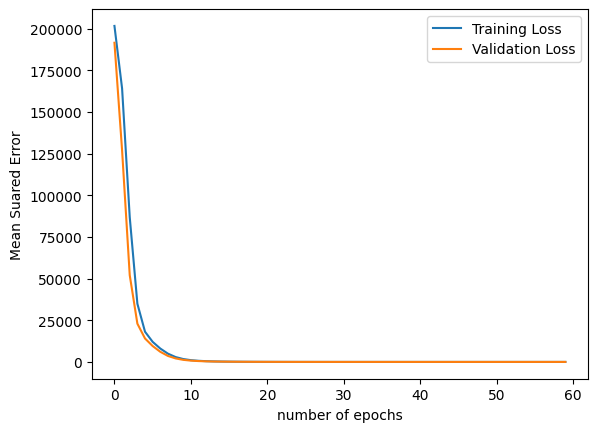

In [33]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label = "Training Loss")
plt.plot(hist.history['val_loss'], label = 'Validation Loss')
plt.xlabel("number of epochs")
plt.ylabel("Mean Suared Error")
plt.legend()
plt.show()

In [35]:
model.evaluate(x_train,y_train)

239/239 [==============================] - 1s 3ms/step - loss: 19.4634 - mae: 3.4653


[19.46344757080078, 3.4652581214904785]

In [36]:
model.evaluate(x_test,y_test)

60/60 [==============================] - 0s 3ms/step - loss: 19.5045 - mae: 3.5062


[19.504457473754883, 3.50618052482605]

# Predict the reults for train and test

In [38]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

60/60 [==============================] - 0s 1ms/step


In [39]:
y_pred_train[0:5]

array([[451.1806 ],
       [477.502  ],
       [467.91394],
       [432.7079 ],
       [466.1914 ]], dtype=float32)

In [40]:
y_pred_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [41]:
y_pred_test[0:5]

array([[429.9591 ],
       [480.41833],
       [482.4074 ],
       [449.357  ],
       [446.86252]], dtype=float32)

In [42]:
y_pred_test.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [43]:
# R2 score in train
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.93228339595073

In [44]:
# R2 score in test
r2_score( y_test,y_pred_test)

0.9353706899955984

# becasue I have r2 score > 0.8 for both train and test I can use above model for out of sample prediction

In [45]:
xnew = pd.read_csv("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv")
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [46]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [47]:
preds = model.predict(xnew_pre)

4/4 [==============================] - 0s 6ms/step


In [48]:
preds[0:5]

array([[445.17633],
       [439.00287],
       [432.7277 ],
       [439.61676],
       [472.83932]], dtype=float32)

In [49]:
xnew["PowerOutput_pred"]= preds

In [50]:
xnew.head()

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,445.176331
1,28.88,54.89,1007.16,46.60,439.002869
2,27.89,73.21,1001.32,85.88,432.727692
3,25.69,62.26,1011.38,74.08,439.616760
4,12.16,40.81,1025.79,70.97,472.839325


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

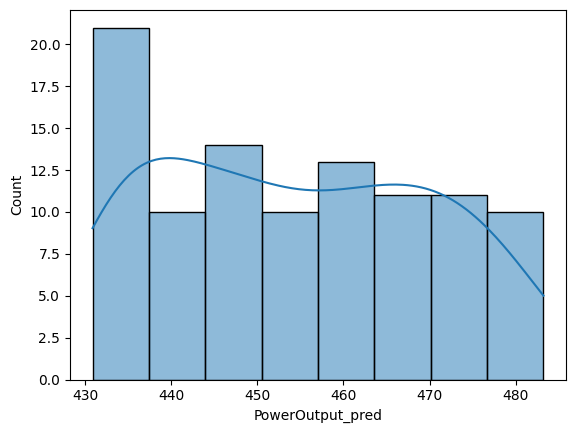

In [52]:
import seaborn as sns
sns.histplot(data=xnew,x = "PowerOutput_pred",kde = True)

In [53]:
xnew.to_csv("Results.csv",index = False)